In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import math
import os
import collections
import dscrutils2py as dscrutils

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pymir import mpl_stylesheet
from pymir import mpl_utils
from pymir import pd_utils

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 72)

INFO: cffi mode is CFFI_MODE.ANY
INFO: R home found: /software/R-3.6.1-el7-x86_64/lib64/R
INFO: R library path: /software/R-3.6.1-el7-x86_64/lib64/R/lib:/usr/local/lib64:/software/java-1.8-x86_64/jre/lib/amd64/server:/software/intel/parallel_studio_xe_2020_update1/mkl/lib/intel64:/software/R-3.6.1-el7-x86_64/lib64/R/lib:/software/R-3.6.1-el7-x86_64/lib64:/software/curl-7.50-el7-x86_64/lib:/software/java-1.8-x86_64/lib:/software/openblas-0.2.19-el7-x86_64/lib:/software/gcc-10.2.0-el7-x86_64/lib64:/software/gcc-10.2.0-el7-x86_64/lib:/software/slurm-current-el7-x86_64/lib64:/software/slurm-current-el7-x86_64/lib:/software/ruby-2.6-el7-x86_64/lib:/software/python-3.7.0-el7-x86_64/lib:/software/git-2.10-el7-x86_64/lib64:/software/subversion-1.9.4-el7-x86_64/lib:/software/serf-1.3.9-el7-x86_64/lib
INFO: LD_LIBRARY_PATH: /software/intel/parallel_studio_xe_2020_update1/mkl/lib/intel64:/software/R-3.6.1-el7-x86_64/lib64/R/lib:/software/R-3.6.1-el7-x86_64/lib64:/software/curl-7.50-el7-x86_64/lib

In [9]:
dsc_outdir = os.path.realpath("/home/saikatbanerjee/scratch/work/gradvi-experiments/trial")

# methods in the simulation
methods = [
    "ridge", "lasso", "elastic_net",
    "lasso_1se", "elastic_net_1se", 
    "scad", "mcp", "l0learn",
    "susie", "varbvs", "varbvsmix", "blasso", "bayesb",
    "mr_ash"
]
dims = [(50, 200),]
sfix = [2,]
targets = ["simulate", "simulate.dims", "simulate.se", "simulate.rho",
           "simulate.sfix", "simulate.pve", "fit", "fit.DSC_TIME", 
           "mse.err", "coef_mse.err"]

In [3]:
%%capture capt
dscout = dscrutils.dscquery(dsc_outdir, targets)

In [5]:
capt.show()

Calling: dsc-query /project2/mstephens/sbanerjee/work/gradvi-experiments/trial -o /tmp/RtmpDjDbau/fileea513ca8f7a.csv --target "simulate simulate.dims simulate.se simulate.rho simulate.sfix simulate.pve fit fit.DSC_TIME mse.err coef_mse.err" --force 
Loaded dscquery output table with 56 rows and 13 columns.


ERROR ==>
Warning message:
replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’ 



In [6]:
import methodprops

In [8]:
method = methods[0]
mconditions = [f"$(fit) == {method}"]
dfselect = pd_utils.select_dfrows(dscout, mconditions)
dfselect[~dfselect['mse.err'].isnull()]

,DSC,simulate,simulate.dims,simulate.se,simulate.rho,simulate.sfix,simulate.pve,fit,fit.DSC_TIME,mse.err,coef_mse.err
24,1,equicorrgauss,"(50,200)",0.876553,0.6,2,0.8,ridge,0.827,1.857478,NaN
25,2,equicorrgauss,"(50,200)",0.267770,0.6,2,0.8,ridge,0.633,0.280098,NaN


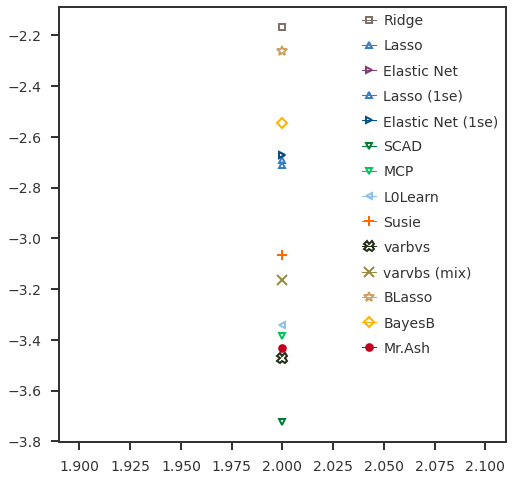

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plotmeta = methodprops.plot_metainfo()
xscale = 'linear'
yscale = 'log10'
colname = 'coef_mse.err'
for method in methods:
    pm  = plotmeta[method]
    mconditions = [f"$(fit) == {method}"]
    dfm = pd_utils.select_dfrows(dscout, mconditions)
    dfselect = dfm[~dfm[colname].isnull()]
    xvals = [x for x in sfix]
    yvals = np.mean(dfselect[colname].to_numpy())
    ax1.plot(
        mpl_utils.scale_array(xvals, xscale), 
        mpl_utils.scale_array(yvals, yscale), 
        label = pm.label, color = pm.color, lw = pm.linewidth / 2, 
        ls = pm.linestyle, marker = pm.marker, ms = pm.size / 1.2, 
        mec = pm.color, mfc = pm.facecolor, mew = pm.linewidth,
        zorder = pm.zorder)
ax1.legend()
plt.show()